Importing the dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

Data collection and Preprocessing

In [5]:
#load dataset
car_dataset = pd.read_csv('car data.csv')

In [6]:
#inspecting the first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [8]:
#check for null and missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#more information on the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#Get the statistical summary of the dataset
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
#checking the distribution of categorical data
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())
print(car_dataset['Car_Name'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


Encoding the categorical data

In [12]:
#encoding the "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding the "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [13]:
#checking to see if encoding was successful

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
car_dataset['Current_Year'] = 2023
car_dataset['number of years'] = car_dataset['Current_Year'] - car_dataset['Year']
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,number of years
0,ritz,2014,3.35,5.59,27000,0,0,0,0,2023,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,2023,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2023,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,2023,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,2023,9


In [15]:
car_dataset.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [16]:
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number of years
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


In [17]:
car_dataset.corr()

/var/folders/rc/j294rj094lb9j6zz6fcghj7m0000gn/T/ipykernel_12815/225720069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_dataset.corr()


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number of years
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
number of years,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


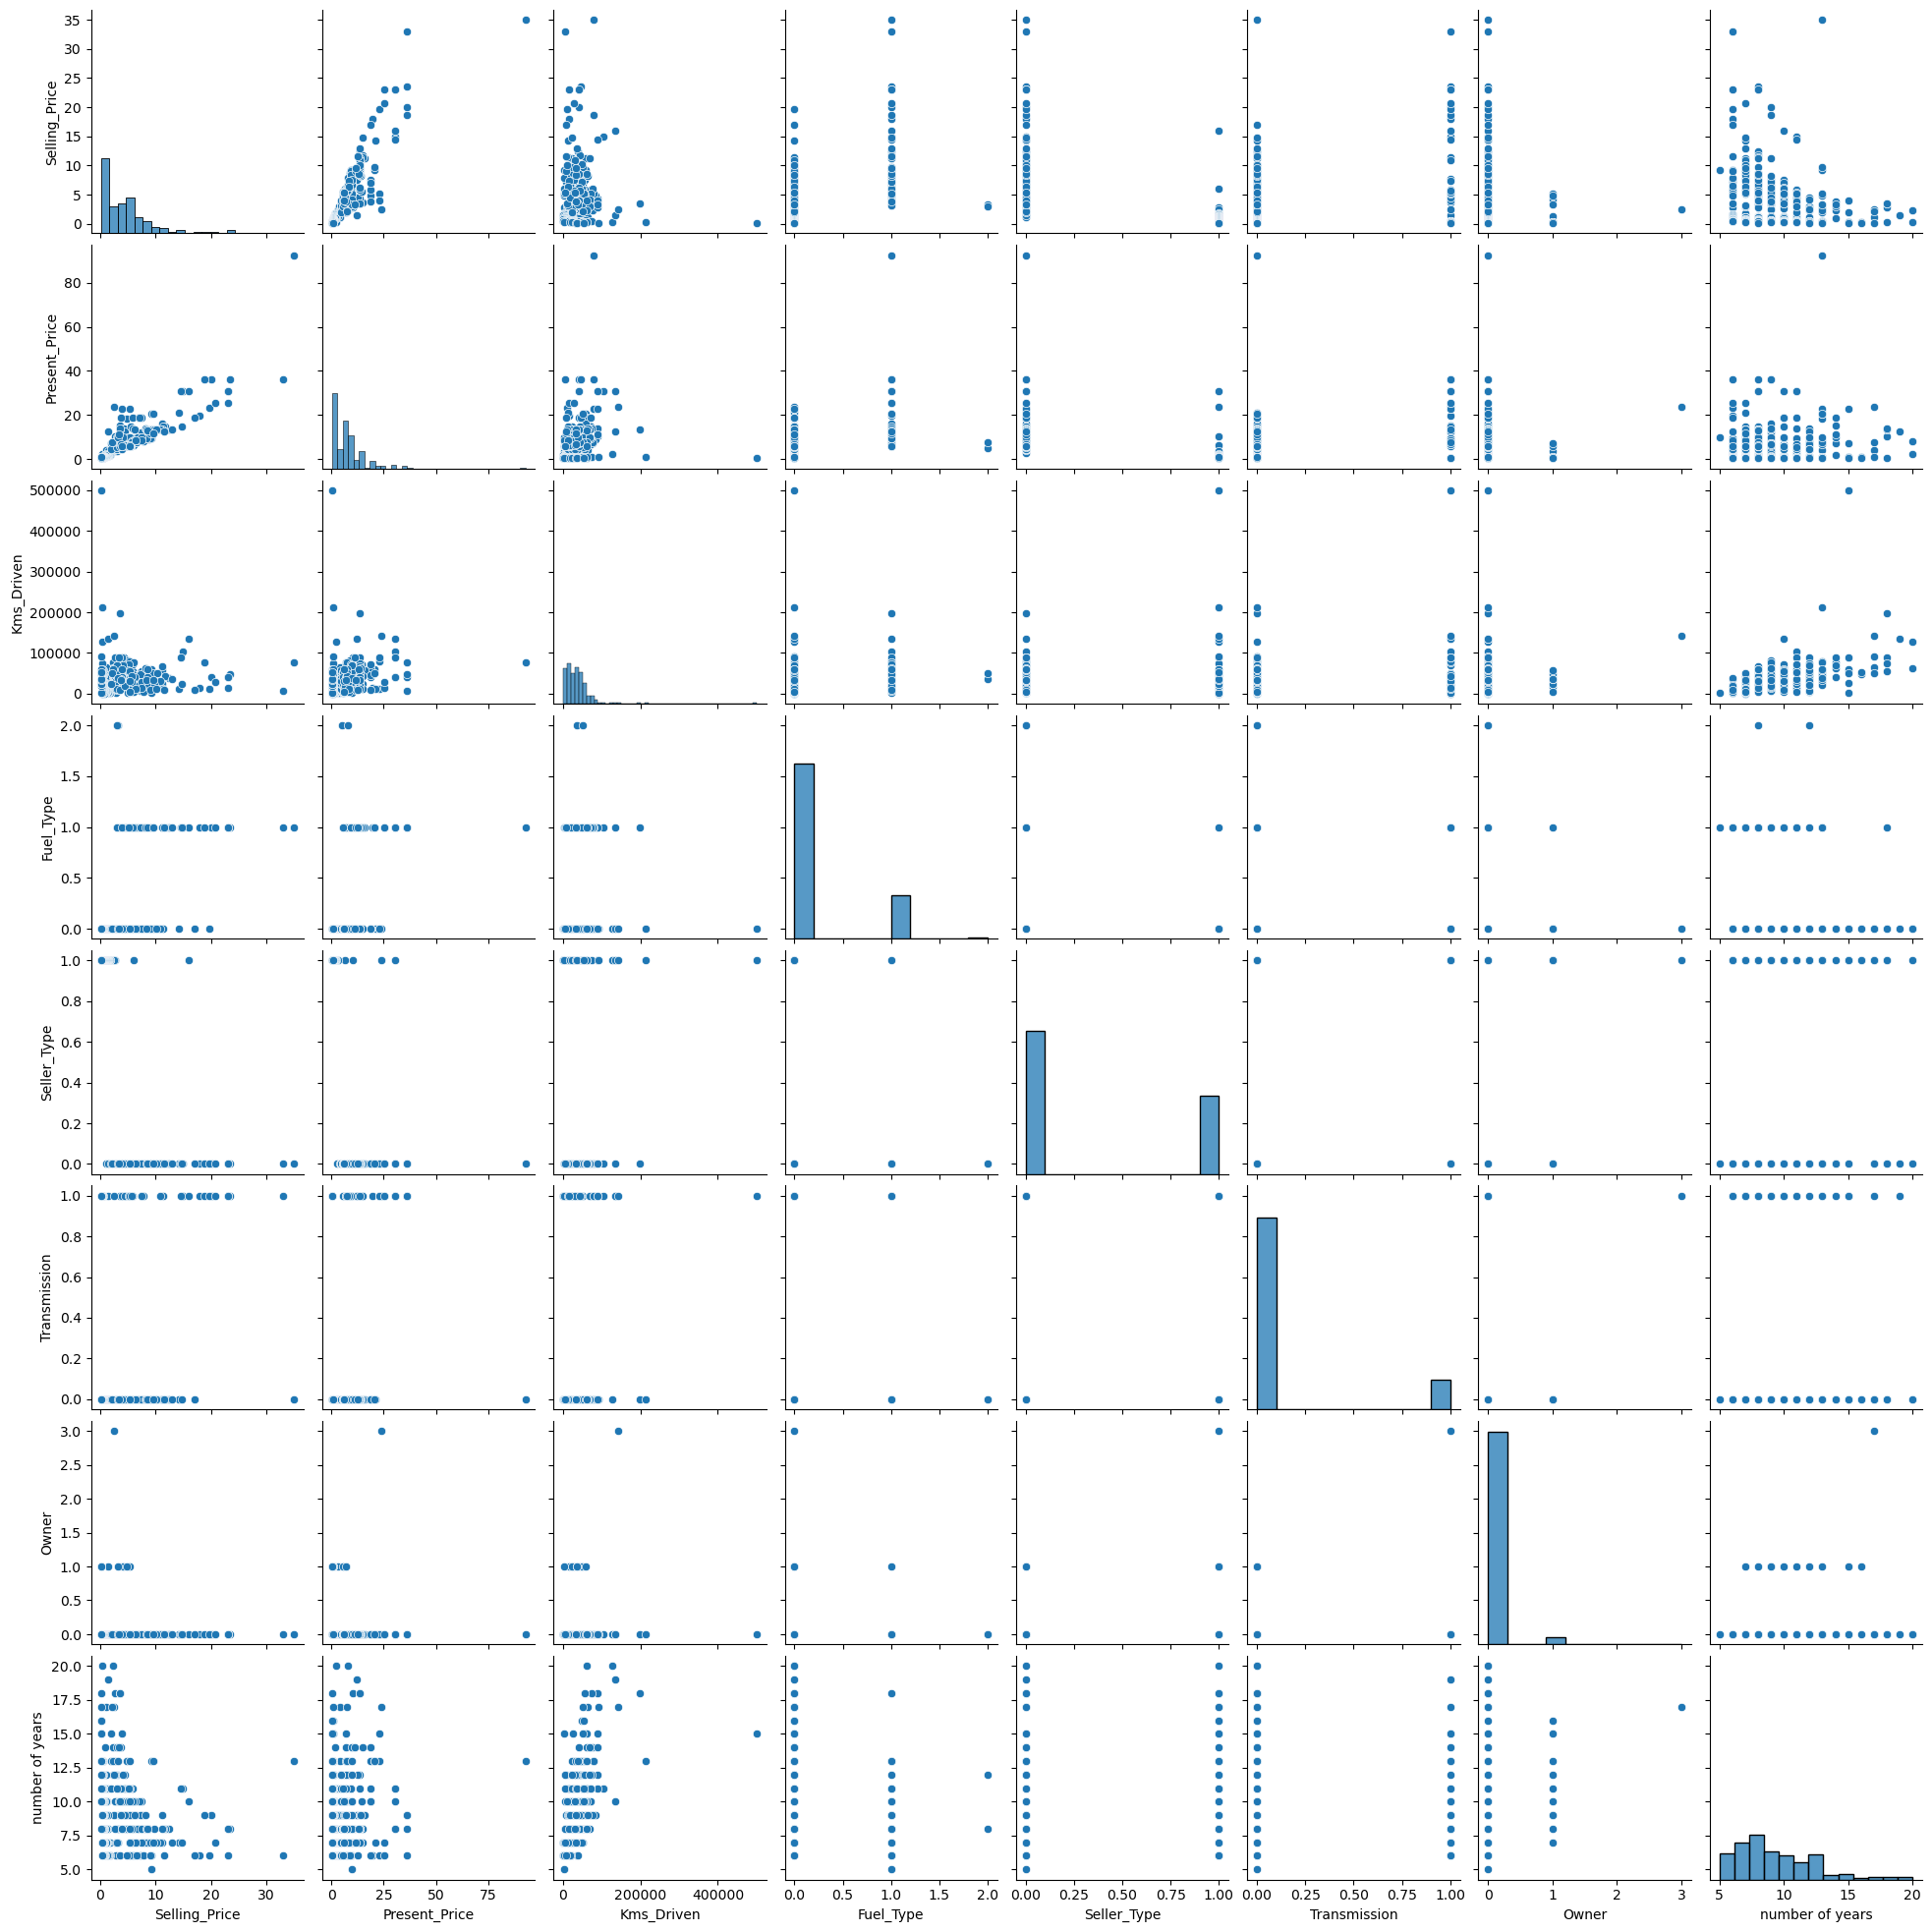

In [18]:
sns.pairplot(car_dataset)

/var/folders/rc/j294rj094lb9j6zz6fcghj7m0000gn/T/ipykernel_12815/2915704755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = car_dataset.corr()


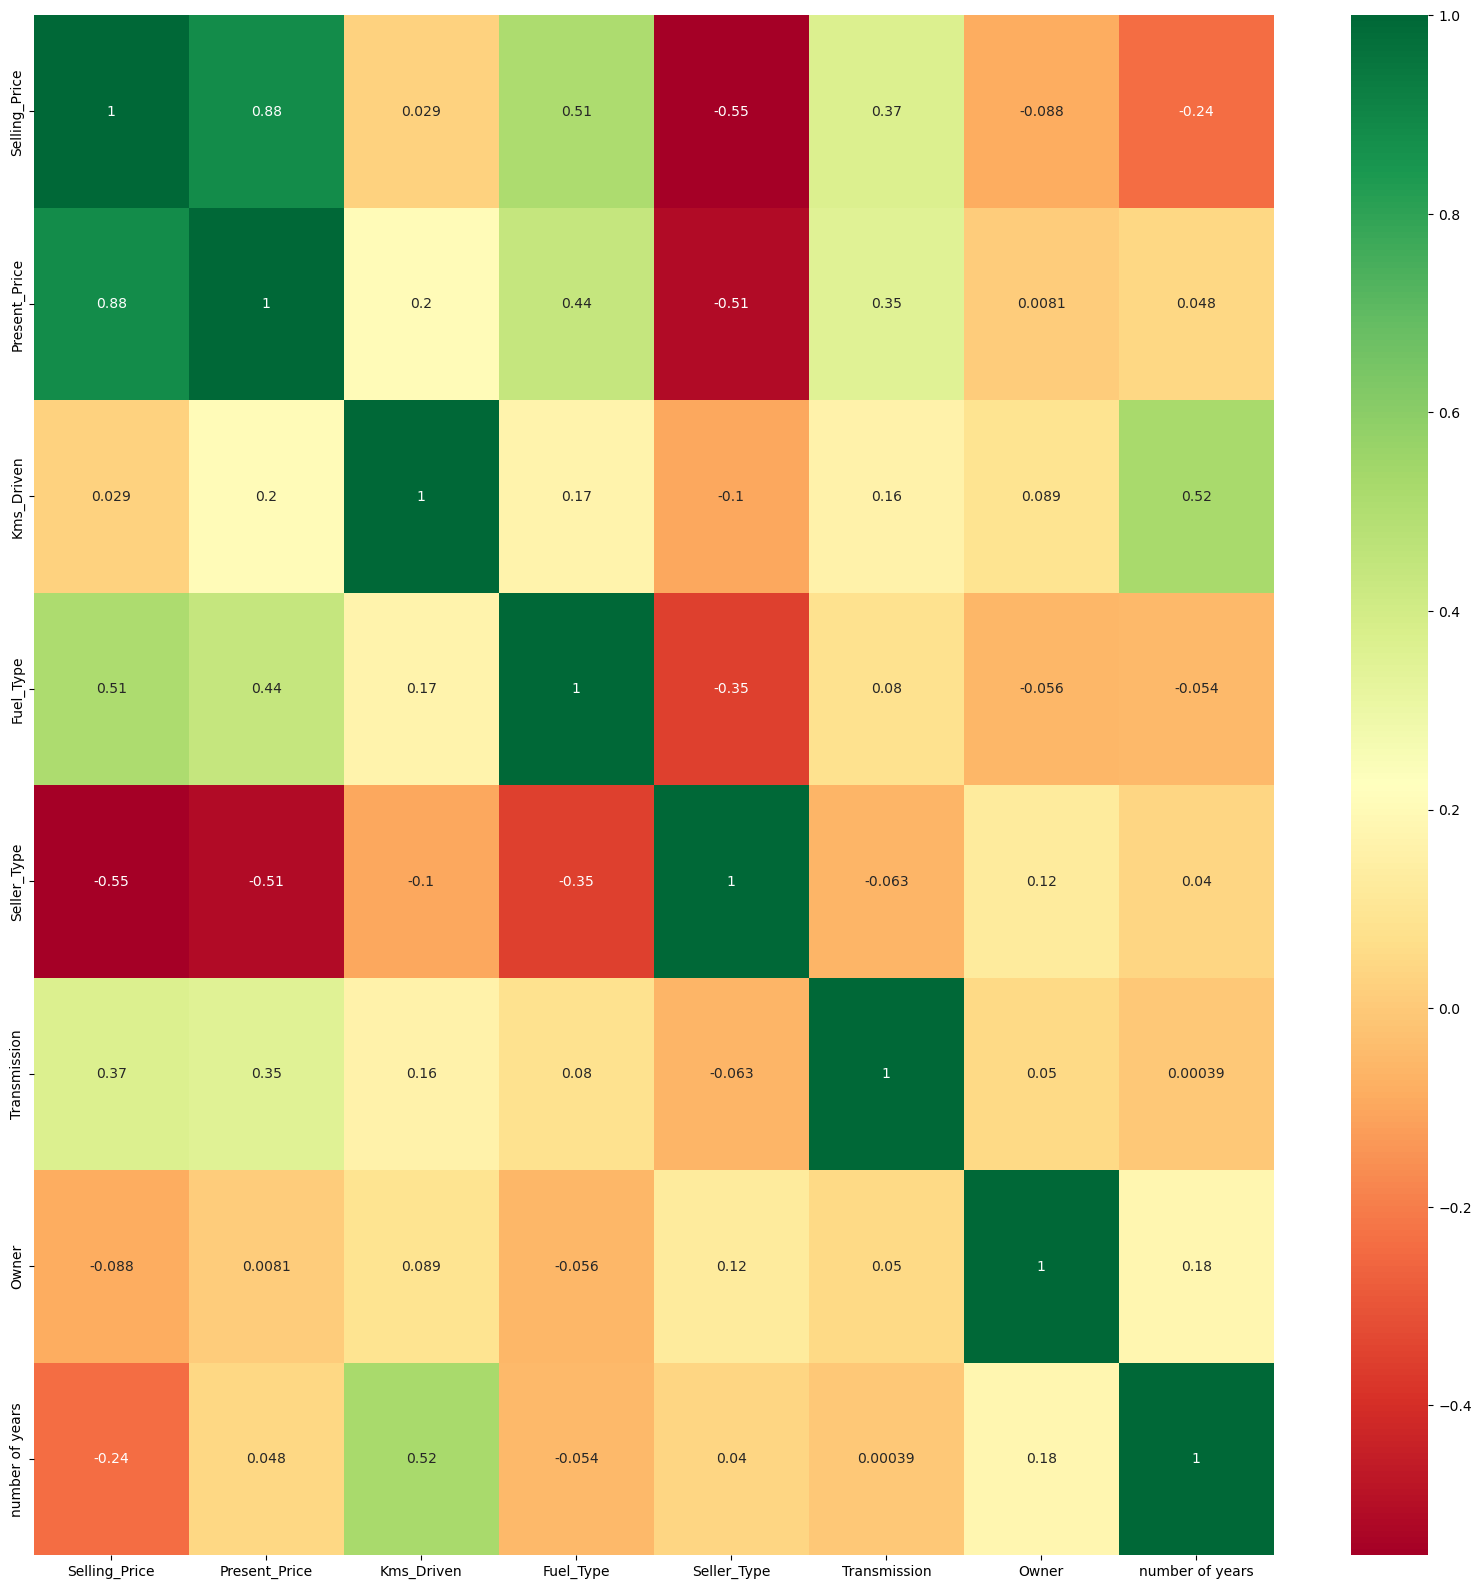

In [19]:
corrmat = car_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plot the heatmap
g = sns.heatmap(car_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Splitting the Data and target variables

In [20]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [21]:
print(X.head())

   Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0           5.59       27000          0            0             0      0   
1           9.54       43000          1            0             0      0   
2           9.85        6900          0            0             0      0   
3           4.15        5200          0            0             0      0   
4           6.87       42450          1            0             0      0   

   number of years  
0                9  
1               10  
2                6  
3               12  
4                9  


In [22]:
print(Y.head())

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [23]:
#Feature Importance
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[4.21258422e-01 3.87308145e-02 1.44059645e-01 2.40251169e-01
 7.76547789e-02 2.40351599e-04 7.78048184e-02]


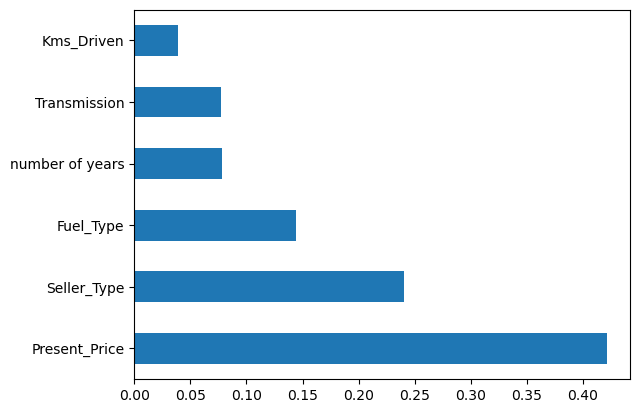

In [24]:
#Plot graph of feature importance for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(6).plot(kind='barh')
plt.show()

Splitting Training and Testing Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [26]:
rf_random = RandomForestRegressor()

# Hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] # Number of trees in random forest
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
#Randominzed Search CV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [28]:
# Create random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
rf = RandomForestRegressor()

In [30]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(X_train, Y_train)

/Users/caephas/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/caephas/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/caephas/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [32]:
predictions = rf_random.predict(X_test)
print(predictions)

[ 9.04263016  0.55713255  4.1509212   3.70692779 10.52903465  4.6698246
  3.43420206  6.82437614  0.26766386  5.63756033  7.59468087  4.20512236
  0.35051027  9.91050814  2.77977138  0.70489395  0.65857486  0.42740461
  9.73169628  4.46152171  1.18052281  7.62993512  0.42381875 10.5832849
  0.60810721  7.59215768  0.63045166  0.22989815  2.93691266  2.78056558
  0.43025568]


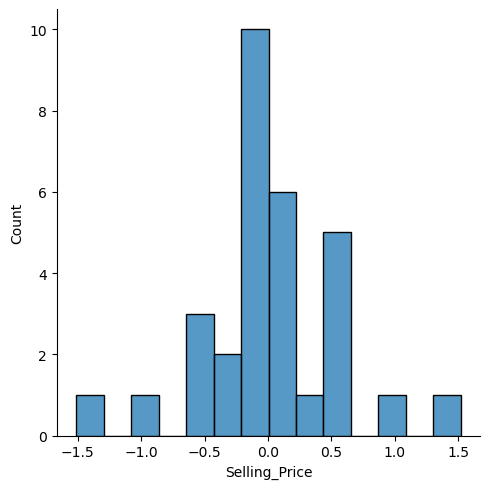

In [33]:
sns.displot(Y_test - predictions)

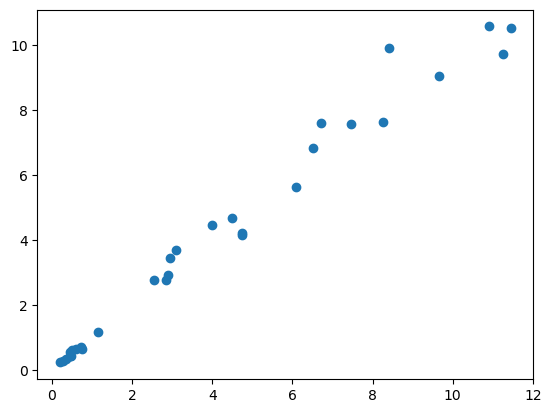

In [34]:
plt.scatter(Y_test,predictions)

In [35]:
file = open('regression_car_data.pkl', 'wb')
pickle.dump(rf_random, file)

In [36]:
with open('regression_car_data.pkl', 'rb') as file:
    model = pickle.load(file)

In [37]:
if hasattr(model, 'feature_names_in_'):
    print(model.feature_names_in_)
else:
    print("Model doesn't have the 'feature_names_in_' attribute.")


['Present_Price' 'Kms_Driven' 'Fuel_Type' 'Seller_Type' 'Transmission'
 'Owner' 'number of years']
